In [1]:
#  独立同一分布
# →互いに独立で同じ確率分布に従う多次元確率変数
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
# 離散型確率変数に対するいくつかの関数を用意しておく
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY =XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [3]:
# n個の確率変数が互いに独立 = 同時確率が周辺確率の積と等しい
# 相関係数も複数の確率変数の関係性を表す指標である。
# しかし、無相関なとき = 互いに独立 は必ずしも成り立たない
# 逆に、互いに独立 = 無相関 は成り立つ
# つまり、独立の方が無相関より、より強い概念である

# 独立な確率変数としていかさまサイコロを考える
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x*y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [4]:
# この2次元確率変数X、Yは独立なので、無相関になっているはず
Cov(XY)

-8.326672684688674e-17

In [5]:
# 無相関だが独立ではない(X、Y)の例
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0,0), (1, 1), (1, -1)]:
        return 1/3
    else:
        return 0
XY = [x_set, y_set, f_XY]

In [6]:
# 共分散を計算
Cov(XY)

0.0

In [7]:
f_X(0) * f_Y(0), f_XY(0,  0)

(0.1111111111111111, 0.333)

In [8]:
# 正規分布の和の分布を考える
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

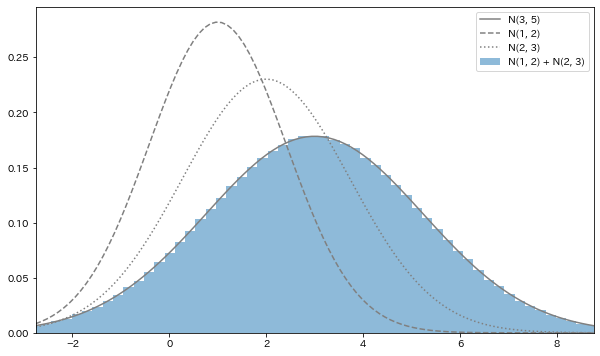

In [9]:
# 同じ確率分布に従う2つの独立な確率変数に対して
# その和もまた同じ確率分布になる性質を「再生性」という
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

In [10]:
# ポアソン分布の和
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999034, 6.989995066843997)

/Users/yuya/.pyenv/versions/anaconda3-2020.07/envs/pyst/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


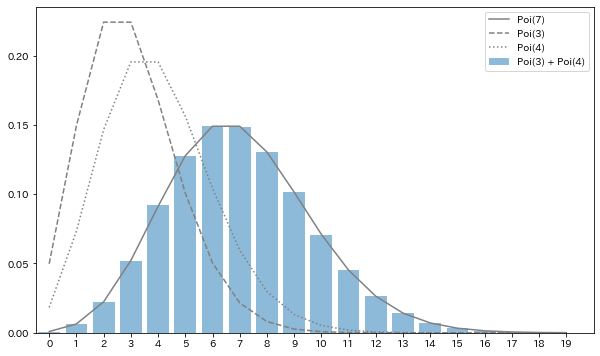

In [14]:
# ポアソン分布も再生性を持つ確率分布
# Poi(7)の確率関数を図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20, range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

In [15]:
# ベルヌーイ分布の和の分布
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

/Users/yuya/.pyenv/versions/anaconda3-2020.07/envs/pyst/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


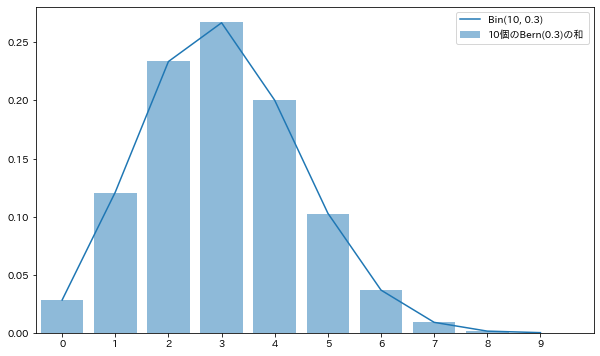

In [16]:
# ベルヌーイ分布には再生性はない
# ただし、ベルヌーイ分布の和は二項分布になる性質がある
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='10個のBern(0.3)の和')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

In [17]:
# 標本平均の分布
# 確率変数X1、X2、....Xnが互いに独立に、期待値がμで分散がσ^2の確率分布F
# に従っているとき
# E(X) = μ、V(X) = σ^2 / n
# が成り立つ

# これが正規分布で成り立つか確認する
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9995466511402974, 0.19942119653587653)

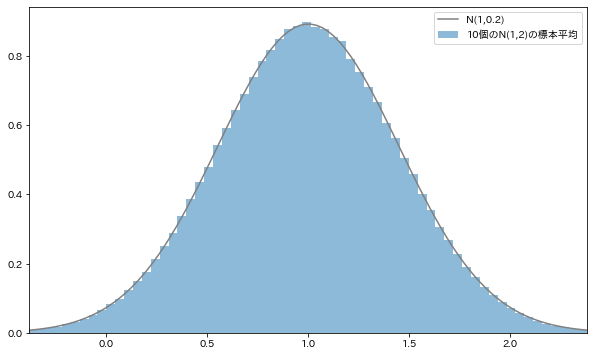

In [18]:
# 正規分布は、標本平均Xも正規分布になる
# 密度関数を図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='10個のN(1,2)の標本平均')
ax.plot(xs, rv_true.pdf(xs), label='N(1,0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

In [19]:
# ポアソン分布の標本平均の分布
# ポアソン分布自体は再生性があるが、標本平均ではポアソン分布を保てない
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9991454, 0.30001874965884007)

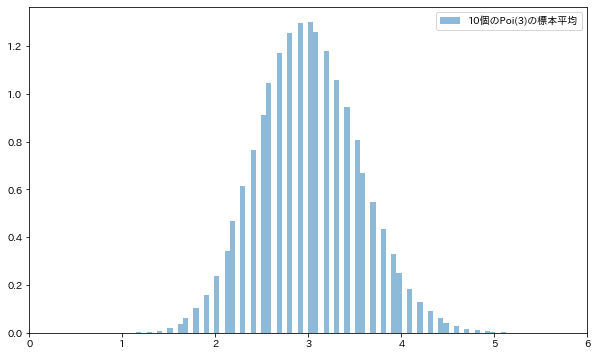

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='10個のPoi(3)の標本平均')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

In [21]:
# 中心極限定理
# 確率変数X1、X2、....Xnが互いに独立に、期待値がμで分散がσ^2の確率分布F
# nが大きくなるにつれ標本平均Xの分布は正規分布N(μ、σ^2 / n)に近づく

# ポアソン分布の標本平均が正規分布に近づく事を確かめる
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='10000個のPoi(3)の標本平均')
ax.plot(xs, rv_true.pdf(xs))

ax.legend()
ax.set_xlim(0, 6)
plt.show()